In [16]:
import numpy as np
import pandas as pd

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data into pandas dataframe**

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Examining the data**


**Observations**

There are 1338 observations and 7 columns for insurance dataset.


In [3]:
df.shape

(1338, 7)

Columns in data frame

In [75]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 100.2 KB


In [81]:
df.head(5)

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [78]:
df.tail(10).T

,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,23.00,52.00,57.00,23.00,52.00,50.00,18.00,18.00,21.00,61.00
gender,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
bmi,24.20,38.60,25.70,33.40,44.70,31.00,31.90,36.90,25.80,29.10
children,2.00,2.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00
smoker,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
region,0.00,3.00,2.00,3.00,3.00,1.00,0.00,2.00,3.00,1.00
expenses,22395.74,10325.21,12629.17,10795.94,11411.69,10600.55,2205.98,1629.83,2007.95,29141.36


There are no Null Values in the insurance dataset

In [79]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [80]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['gender', 'smoker', 'region']


In [11]:
df.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / df.shape[0]] )

age         [0, 0.0]
sex         [0, 0.0]
bmi         [0, 0.0]
children    [0, 0.0]
smoker      [0, 0.0]
region      [0, 0.0]
expenses    [0, 0.0]
dtype: object

In [9]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
1%,18.000000,17.937000,0.000000,1252.976100
5%,18.000000,21.270000,0.000000,1757.754500
10%,19.000000,23.000000,0.000000,2346.535000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000


In [18]:
from scipy.stats import kurtosis, skew, stats

In [19]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skew:  1.5141797167430497
kurtosis:  1.5958213684180036
missing charges values: 0
missing smoker values: 0


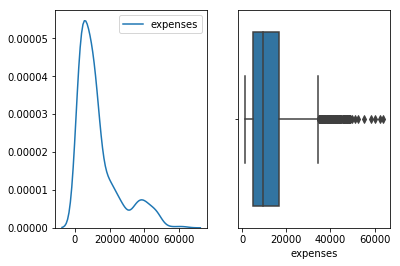

In [15]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
plt.show()

Both the boxplot and kernel density estimation plot reveal that the expenses data is right skewed. Furthermore, there are some outliers but no missing charges and smoker values


In [10]:
insur_corr=df.corr()
insur_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [11]:
insur_cov=df.cov()
insur_cov

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


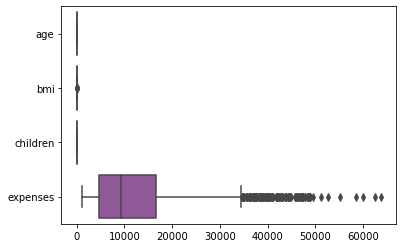

In [12]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [115]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [116]:
x=df[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  expenses  Outliers count  139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47,

In [21]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [22]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Change the column 'Sex' to 'Gender'

In [23]:
df.rename(columns={'sex': 'gender'}, inplace=True, level=None)

In [24]:
df.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

Check how many duplicated data is there?

In [25]:
df.duplicated().sum()

1

Remove all duplicated data

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

**PLOT THE INSURANCE PREMIUM DATASET**

<AxesSubplot:ylabel='Frequency'>

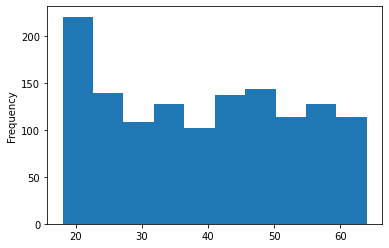

In [28]:
df.age.plot(kind="hist")

In [29]:
df.smoker.count()

1337

Text(0, 0.5, 'count')

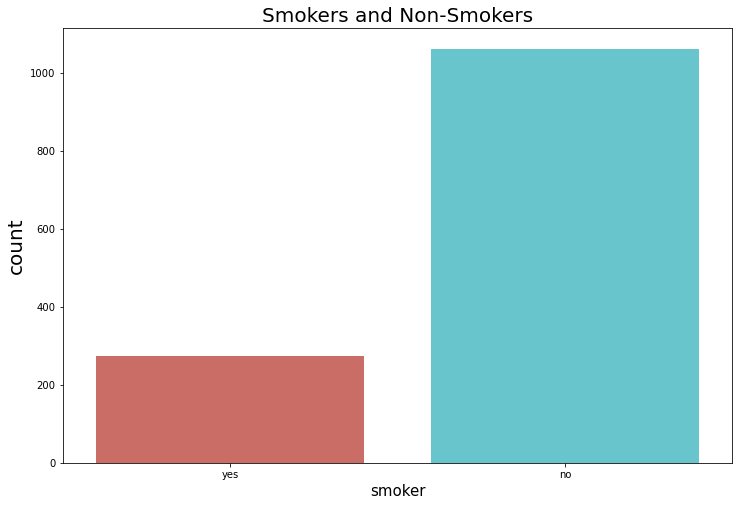

In [30]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

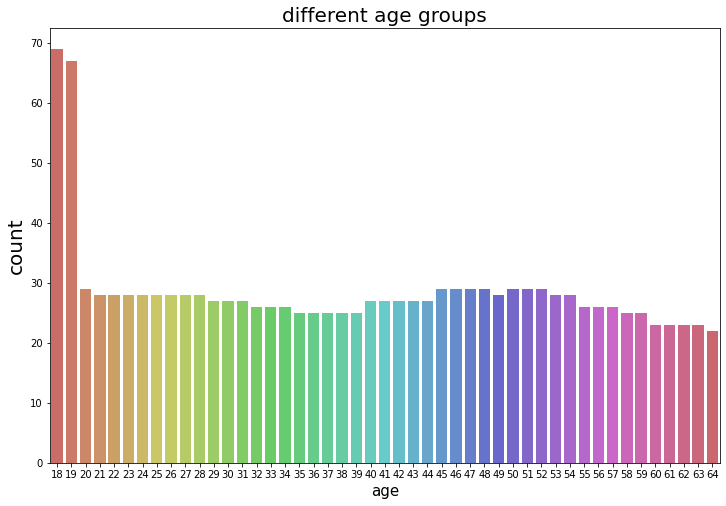

In [31]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

**KERNEL DENSITY PLOT - BMI**

C:\Users\Vikitha Reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

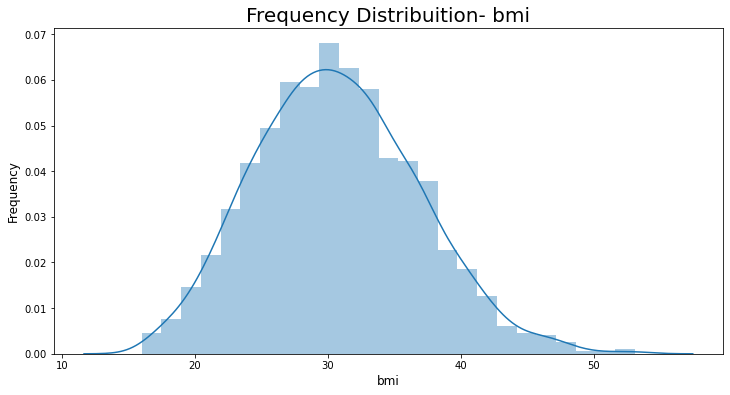

In [32]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

**OBSERVATION**: The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density and the histogram is normalized by default so that it has the same y-scale as the density plot.

**Observation**: The Shape of the Expenses Data is Right Skewed Distribution 

BOX PLOT Using SeaBorn


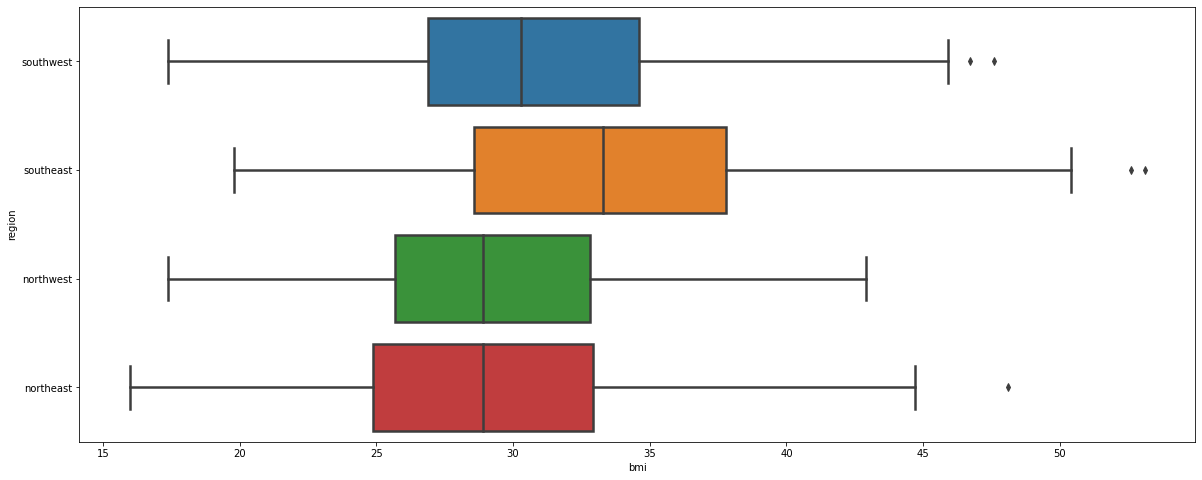

In [33]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)
plt.show()

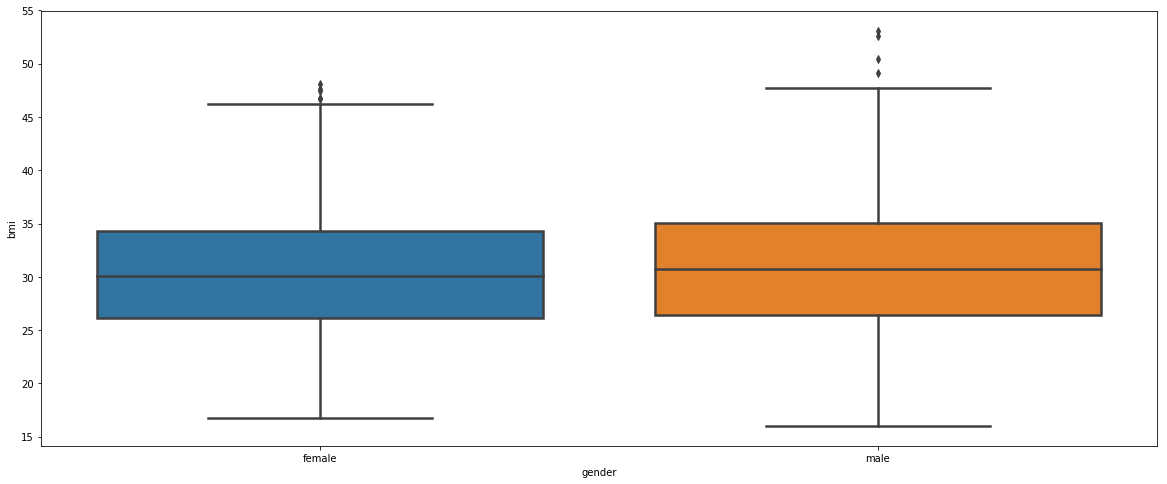

In [34]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="gender" ,y="bmi", data=df, linewidth=2.5)
plt.show()

<AxesSubplot:ylabel='Frequency'>

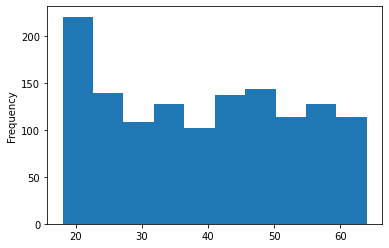

In [34]:
df.age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

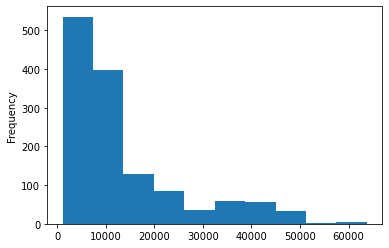

In [35]:
df.expenses.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

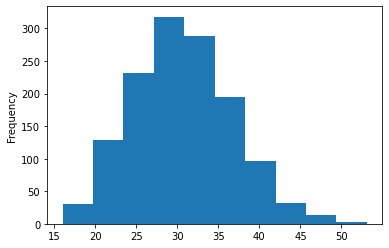

In [36]:
df.bmi.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

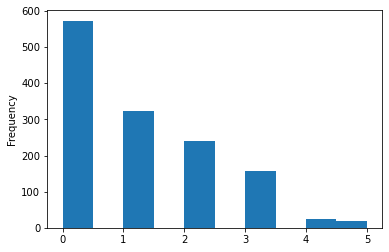

In [37]:
df.children.plot(kind="hist")

<AxesSubplot:ylabel='region'>

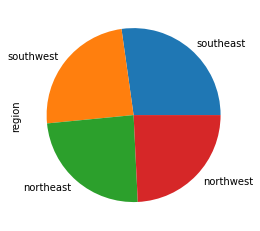

In [38]:
df.region.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='smoker'>

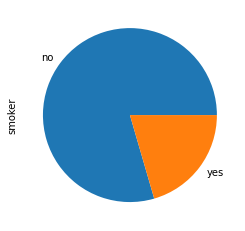

In [39]:
df.smoker.value_counts().plot(kind="pie")

Mean Expenses for Smokers is more than Non Smokers

In [40]:
df.groupby("smoker").expenses.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8440.660461,7345.73,1063
yes,32050.231971,34456.35,274


**Observation**: The mean, median and count differences between Smokers and Non Smokers is very large.**

Expenses for male and female

In [42]:
df.groupby("gender").expenses.agg(["mean","median","count"])

,mean,median,count
gender,,,
female,12569.578897,9412.965,662
male,13974.999111,9377.900,675


Mean of Smokers and Non Smokers

In [43]:
df.groupby("smoker").age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

Correlation Heatmap

Find the correlation of the dataframe and plot it as the heat map

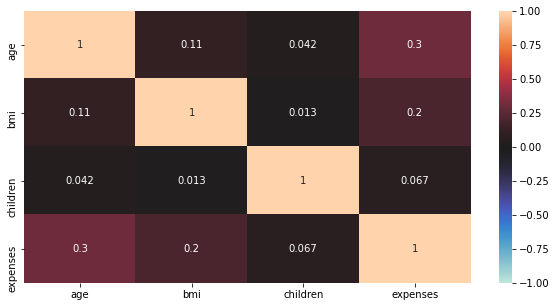

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

**Above correlation and covariance value inform that there exist strong relationship between expenses. AGE (0.3) and BMI(0.2) for numerical variables**

Scatter plots
To create a simple scatter plot, we use the sns.scatterplot command

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

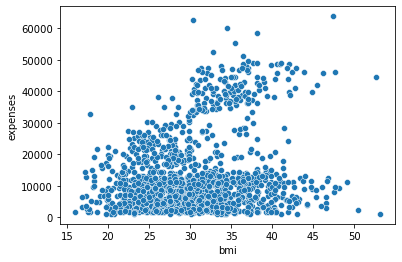

In [45]:
sns.scatterplot(x=df['bmi'], y=df['expenses'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

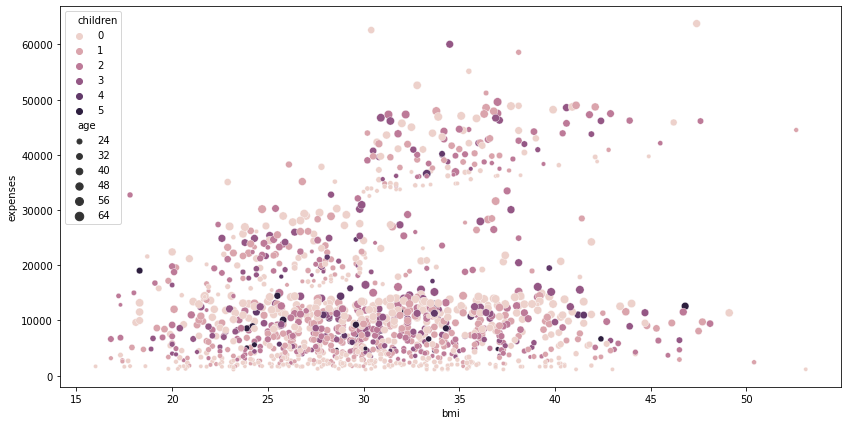

In [47]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['children'],size=df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

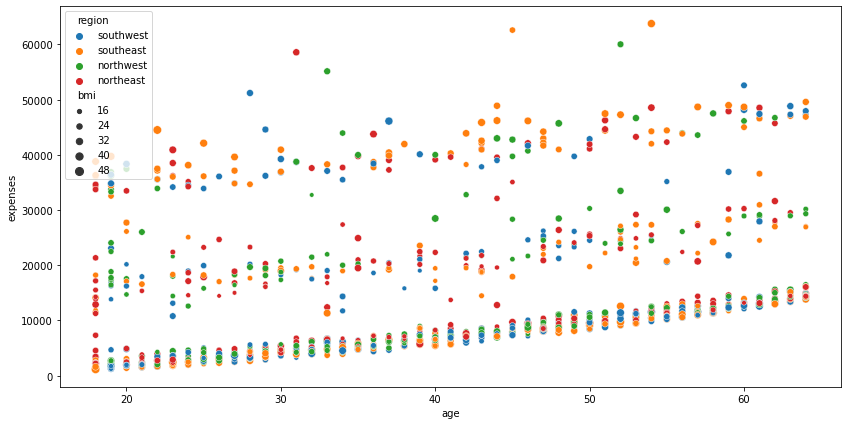

In [48]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['region'],size=df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

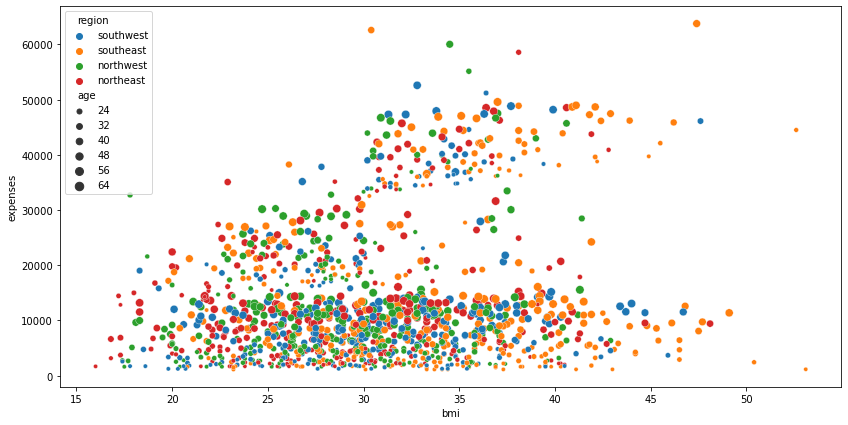

In [49]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['region'],size=df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

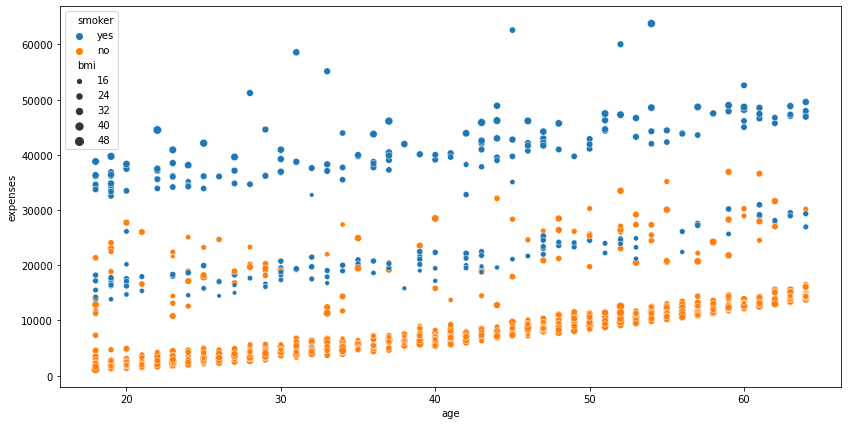

In [50]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['smoker'],size=df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

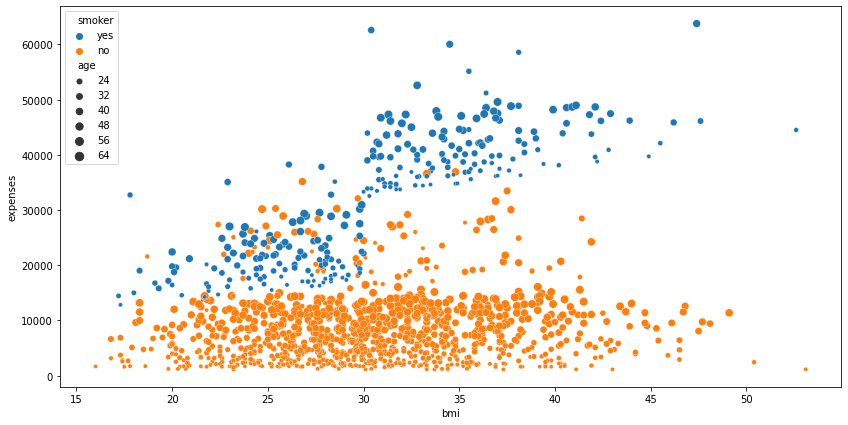

In [51]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['smoker'],size=df['age'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

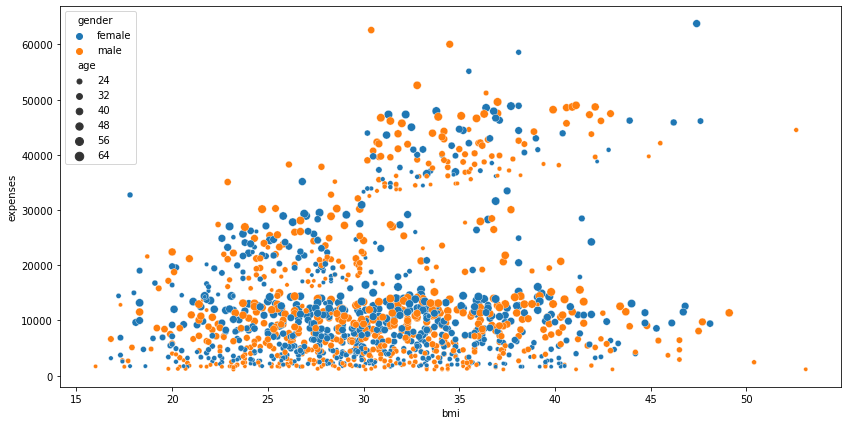

In [52]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['gender'],size=df['age'])

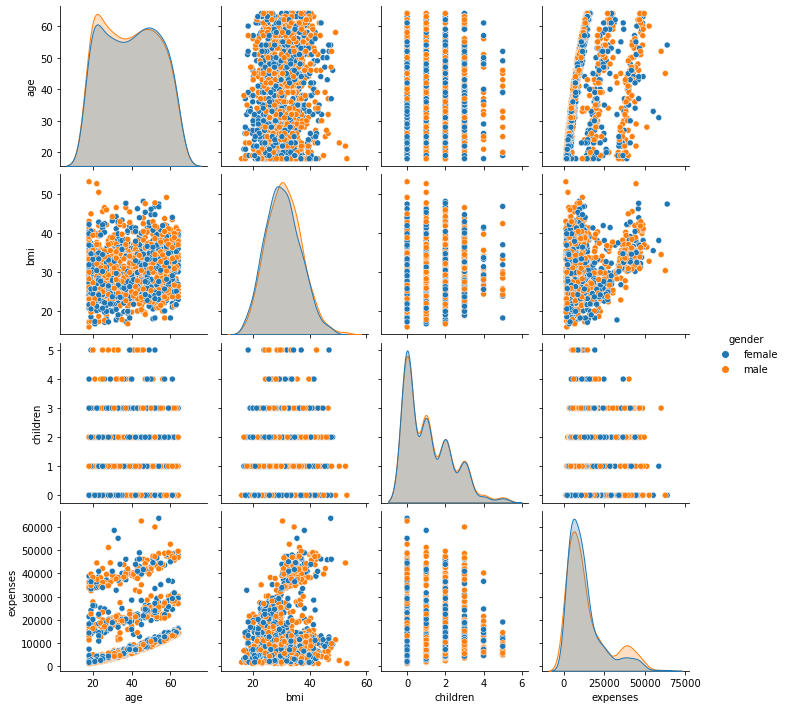

In [53]:
sns.pairplot(data=df,hue='gender')

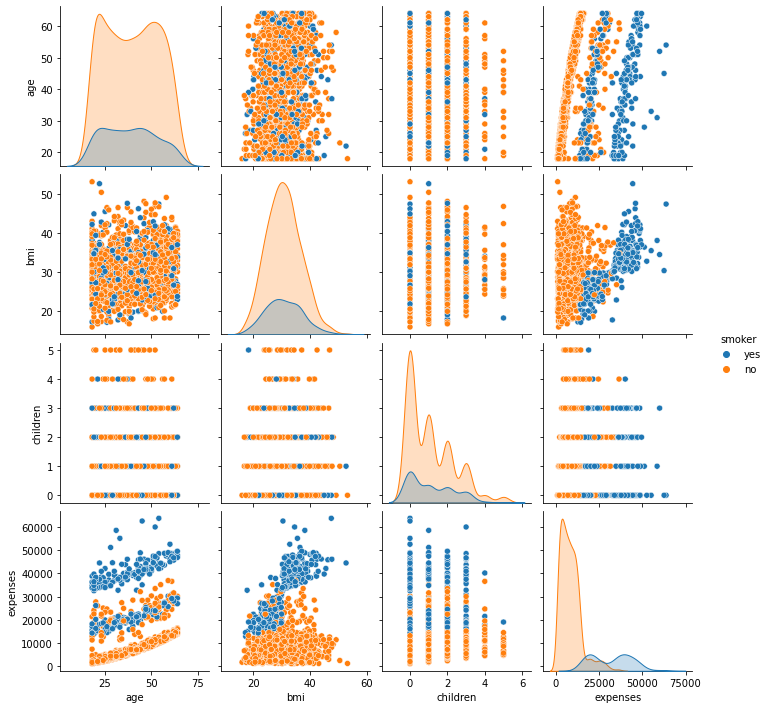

In [54]:
sns.pairplot(data=df,hue='smoker')

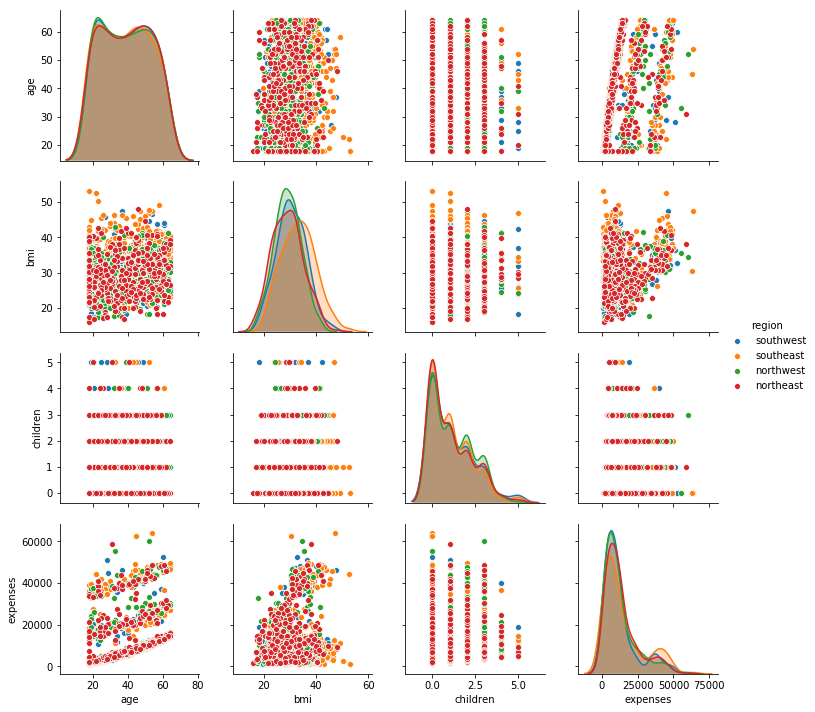

In [54]:
sns.pairplot(data=df,hue='region')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

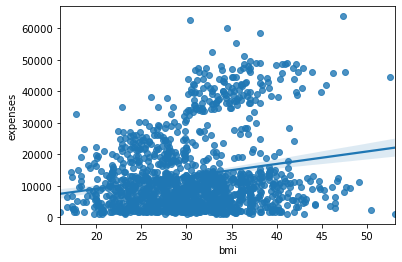

In [55]:
sns.regplot(x=df['bmi'], y=df['expenses'])

**Color-coded scatter plots**
We can use scatter plots to display the relationships between not two, but even three variables. One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance expenses, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'expenses') on the axes.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

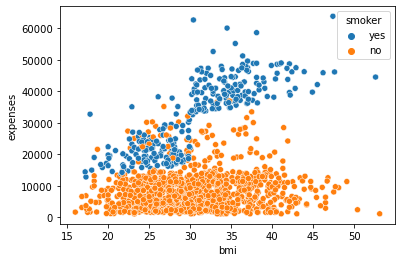

In [56]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue=df['smoker'])

This scatter plot shows that nonsmokers tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize, Use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. 
( The below plot shows the regression line of smokers has a much steeper slope when compared to line of nonsmokers!)

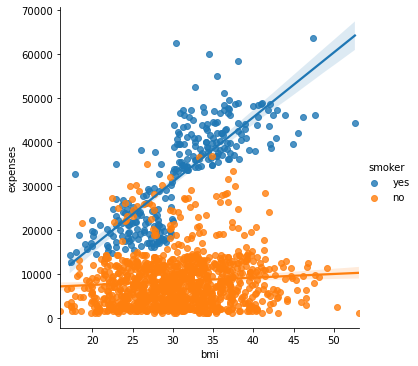

In [58]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

C:\Users\Vikitha Reddy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

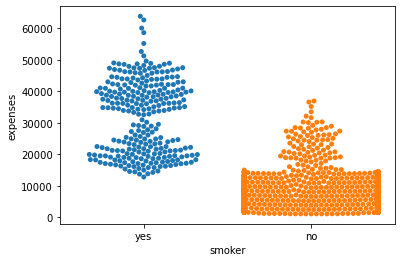

In [59]:
sns.swarmplot(x=df['smoker'],
              y=df['expenses'])

The Swarm plot shows us that: on average, non-smokers are charged less than smokers, and
the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

**Finding the Overall Distribution of Insurance Premium Data**

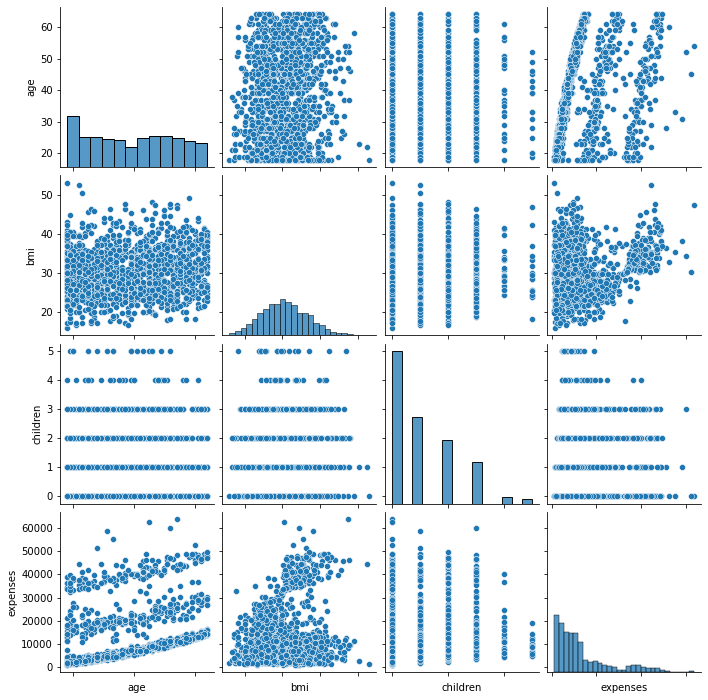

In [61]:
import seaborn as sns
g = sns.pairplot(df)
g.set(xticklabels=[])

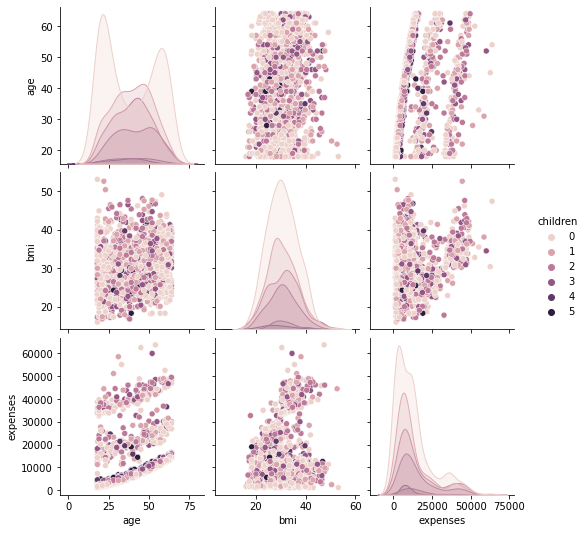

In [62]:
sns.pairplot(data=df,hue='children')

In [63]:
# Importing necessary package for creating model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [64]:
cat_col=['smoker','region','gender']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [65]:
# one-hot encoding
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,gender_female,gender_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [82]:
cat_col

['smoker', 'region', 'gender']

In [117]:
# label encoding
# insr_procsd_df_label=df
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for i in cat_col:
#     insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
# insr_procsd_df_label.head(10)

In [118]:
#using one hot encoding
X=insur_procsd_df.drop(columns='expenses')
y=df[['expenses']]

In [119]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)

In [120]:
train_X['bmi'].describe()

count    935.000000
mean      30.841497
std        6.042530
min       16.000000
25%       26.700000
50%       30.600000
75%       34.800000
max       53.100000
Name: bmi, dtype: float64

In [121]:
test_X['bmi'].describe()

count    402.000000
mean      30.256219
std        6.222137
min       16.800000
25%       25.700000
50%       29.950000
75%       34.100000
max       50.400000
Name: bmi, dtype: float64

In [122]:
X['bmi'].describe()

count    1337.000000
mean       30.665520
std         6.100664
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [123]:
train_X.shape, test_X.shape

((935, 11), (402, 11))

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [125]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [126]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_,"Model co-efficent",model.coef_)

Model intercept [13241.28203793] Model co-efficent [[ 3.57141397e+03  2.00780247e+03  6.09665460e+02 -5.85515030e+15
  -5.85515030e+15 -2.27294860e+16 -2.28947793e+16 -2.34225641e+16
  -2.24550883e+16  2.25649800e+15  2.25649800e+15]]


In [127]:
cdf = pd.DataFrame(data=model.coef_.T, index=X.columns, columns=["Coefficients"])
cdf

,Coefficients
age,3.571414e+03
bmi,2.007802e+03
children,6.096655e+02
smoker_no,-5.855150e+15
smoker_yes,-5.855150e+15
region_northeast,-2.272949e+16
region_northwest,-2.289478e+16
region_southeast,-2.342256e+16
region_southwest,-2.245509e+16
gender_female,2.256498e+15


In [128]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Predicting the train data")
train_predict = model.predict(train_X)
print("Predicting the test data")
test_predict = model.predict(test_X)
print("MAE")
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))
print("====================================")
print("MSE")
print("Train : ",mean_squared_error(train_y,train_predict))
print("Test  : ",mean_squared_error(test_y,test_predict))
print("====================================")
import numpy as np
print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(test_y,test_predict)))
print("====================================")
print("R^2")
print("Train : ",r2_score(train_y,train_predict))
print("Test  : ",r2_score(test_y,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4136.33205707973
Test  :  4228.024791096863
MSE
Train :  37068910.950045735
Test  :  36048640.10367939
RMSE
Train :  6088.424340504343
Test  :  6004.051973765666
R^2
Train :  0.7508461665236511
Test  :  0.7449777815094095
MAPE
Train :  expenses    41.70253
dtype: float64
Test  :  expenses    42.39225
dtype: float64


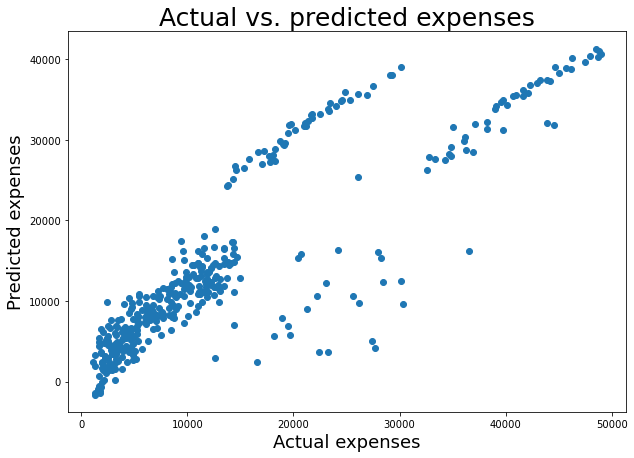

In [129]:
#Plot actual vs predicted value
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted expenses",fontsize=25)
plt.xlabel("Actual expenses",fontsize=18)
plt.ylabel("Predicted expenses", fontsize=18)
plt.scatter(x=test_y,y=test_predict)

In [131]:
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

MAPE
Train :  expenses    41.70253
dtype: float64
Test  :  expenses    42.39225
dtype: float64
